In [36]:
import psycopg2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import io

In [37]:
conn_string = "host='localhost' dbname='phone_usage_db' user='postgres' password='postgres'"
conn = psycopg2.connect(conn_string)

print("Database opened successfully")
cursor = conn.cursor();
query = 'select * from phone_user_behavior'
cursor.execute(query)

colnames = [desc[0] for desc in cursor.description]


print(colnames)


phone_df = pd.DataFrame(cursor.fetchall(), columns=colnames)

conn.close()

print("Database Closed successfully")

Database opened successfully
['user_id', 'device_model', 'operating_system', 'app_usage_minutes_per_day', 'screen_time_hours_per_day', 'battery_drain_mah_per_day', 'number_of_apps_installed', 'data_usage_mb_per_day', 'age', 'gender', 'user_behavior_class']
Database Closed successfully


In [38]:
phone_df['age'].sort_values()

561    18
116    18
685    18
686    18
258    18
       ..
225    59
192    59
660    59
619    59
597    59
Name: age, Length: 700, dtype: int64

In [39]:
json_data = phone_df.to_json(orient='index')

In [40]:
clean_json = json.loads(json_data)

In [41]:
print(json_data)

{"0":{"user_id":1,"device_model":"Google Pixel 5","operating_system":"Android","app_usage_minutes_per_day":393,"screen_time_hours_per_day":6.4,"battery_drain_mah_per_day":1872,"number_of_apps_installed":67,"data_usage_mb_per_day":1122,"age":40,"gender":"Male","user_behavior_class":4},"1":{"user_id":2,"device_model":"OnePlus 9","operating_system":"Android","app_usage_minutes_per_day":268,"screen_time_hours_per_day":4.7,"battery_drain_mah_per_day":1331,"number_of_apps_installed":42,"data_usage_mb_per_day":944,"age":47,"gender":"Female","user_behavior_class":3},"2":{"user_id":3,"device_model":"Xiaomi Mi 11","operating_system":"Android","app_usage_minutes_per_day":154,"screen_time_hours_per_day":4.0,"battery_drain_mah_per_day":761,"number_of_apps_installed":32,"data_usage_mb_per_day":322,"age":42,"gender":"Male","user_behavior_class":2},"3":{"user_id":4,"device_model":"Google Pixel 5","operating_system":"Android","app_usage_minutes_per_day":239,"screen_time_hours_per_day":4.8,"battery_drai

/var/folders/c5/49gjf4515dq14r1sfkhgdnv00000gn/T/ipykernel_82586/1039567466.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_battery_age = phone_df_battery.groupby(["age_groups"])["battery_drain_mah_per_day"].mean()


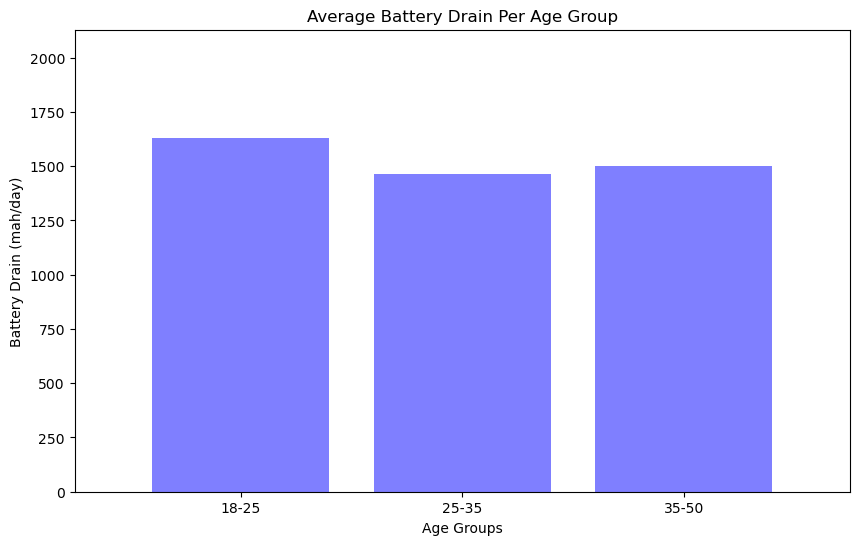

In [46]:
    phone_df_battery = phone_df.copy()
    
    bins = [18,25,35,50]
    labels = ["18-25","25-35","35-50"]
    phone_df_battery['age_groups'] = pd.cut(phone_df_battery['age'], bins, labels=labels)
    
    mean_battery_age = phone_df_battery.groupby(["age_groups"])["battery_drain_mah_per_day"].mean()
    
    #Bar chart for Average Battery Drain vs. Age 
    mean_battery_age_df = pd.DataFrame({"average_battery_drain": mean_battery_age})
    reset_df_battery = mean_battery_age_df.reset_index()
    reset_df_battery["average_battery_drain"].astype(int)
    x_axis = np.arange(len(mean_battery_age))
    plt.figure(figsize=(10, 6))
    plt.bar(x_axis, reset_df_battery["average_battery_drain"], color ='blue', alpha=0.5, align="center")
    plt.xlim(-0.75,len(x_axis)-0.25)
    plt.ylim(0,max(mean_battery_age)+500)
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, reset_df_battery["age_groups"])
    plt.title("Average Battery Drain Per Age Group")
    plt.xlabel("Age Groups")
    plt.ylabel("Battery Drain (mah/day)")
    
    plt.savefig('test.png')